In [15]:
import pandas as pd
import numpy as np  
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from  sklearn.gaussian_process.kernels import RBF,WhiteKernel,DotProduct,ConstantKernel,Matern
from sklearn.model_selection import KFold
import random as t_random
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.model_selection import KFold
from scipy.interpolate import interp1d
import statsmodels.api as sm
import seaborn as sns

In [24]:
common = pd.read_csv('D:\\workspace\\ionstar_dataset\RT_benchmark2\\data_from_single_model\\testdata_Ax_By_1_6.txt',sep='\t')
# x
data_B = common['rt_y'].values
# y 
data_A = common['rt_x'].values
data_B = np.reshape(data_B, [common.shape[0], 1])
data_A = np.reshape(data_A, [common.shape[0], 1])


In [25]:
X_train, X_test, y_train, y_test = train_test_split( data_B, data_A, test_size=.10, random_state=42)
print (X_train.shape)
print (y_test.shape)

(8447, 1)
(939, 1)


In [35]:
lowess = sm.nonparametric.lowess(y_train.flatten(), X_train.flatten(), frac=.1)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

f = interp1d(lowess_x, lowess_y, bounds_error=False)

y_pred_loes = f(X_test)

if y_pred_loes[np.isnan(y_pred_loes) ].shape[0] > 0 :
    print ('nan predicted value corected for ',y_pred_loes[np.isnan(y_pred_loes) ].shape[0])
    print ('LOEWSS mean abs error on test set {}'.format(mean_absolute_error(y_test[~ np.isnan(y_pred_loes) ] , y_pred_loes[~ np.isnan(y_pred_loes) ])))

    y_pred_loes[ np.isnan(y_pred_loes) ] = 0
else:
     print ('LOEWSS mean abs error on test set {}'.format(mean_absolute_error(y_test, y_pred_loes)))
    
#print (y_pred_loes)
lowess_error = [ mean_absolute_error( y ,y__) for y,y__ in zip(y_test,y_pred_loes) ]
#kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(length_scale=1, length_scale_bounds=(1e-5, 1e5)) + WhiteKernel(
#            noise_level=0.2, noise_level_bounds=(1e-5, 1e2))
#m_ = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=False, n_restarts_optimizer=1).fit(
  #                                                                                              np.array(lowess_x).reshape(-1,1),
                                                                                                #np.array(lowess_y).reshape(-1, 1))


# for initial weight sampling  like actually is in implemented
#y_train_predicted_m_, y_cov_train_m_ = m_.predict(data_B[tt_x],  return_std=True, return_cov=False)
#print ('LOEWSS GP trai R2 score {}'.format(r2_score(data_B[tt_x], y_train_predicted_m_)))

#  simple random split 
#y_train_predicted_m_, y_cov_train_m_ = m_.predict(all_train,  return_std=True, return_cov=False)
#print ('LOEWSS GP train R2 score {}'.format(r2_score(all_train, y_train_predicted_m_)))




nan predicted value corected for  1
LOEWSS mean abs error on test set 0.28780250045775885
(939, 1) (939, 1)


(0, 250)

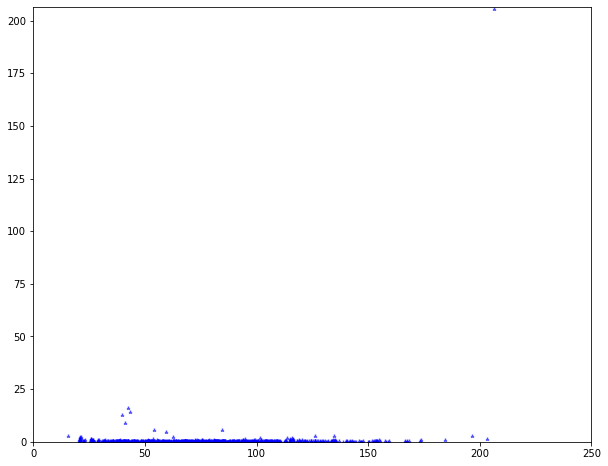

In [31]:
plt.figure(figsize=(10, 8) )
#print (max(lowess_error))
#sns.distplot(lowess_error)

plt.scatter(X_test,lowess_error, marker='2',c='blue',s=15,alpha=0.7)
#plt.hlines(5,0,250)
plt.ylim(0,max(lowess_error)+1)
plt.xlim(0,250)

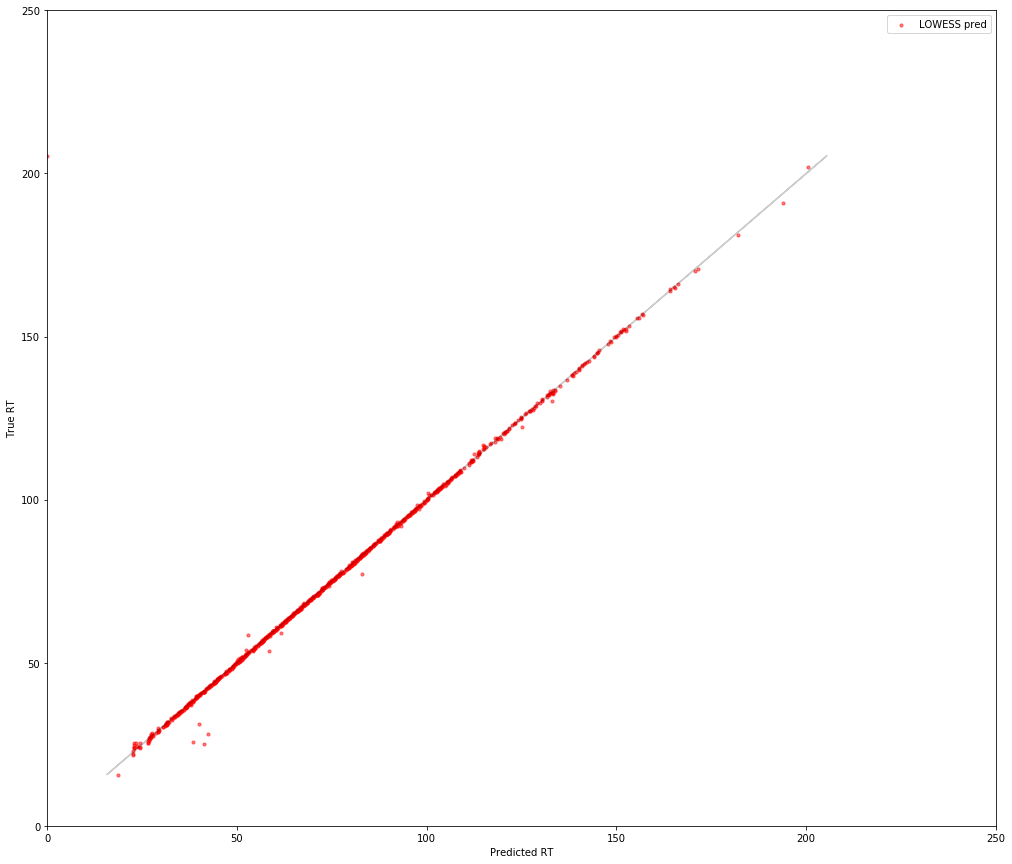

In [30]:
plt.figure(figsize=(17, 15) )
#ax=plt.gca()
#plt.plot(lowess_x,lowess_y,':b',alpha=0.6)
#plt.scatter(X_train,y_train, marker='2',c='blue',s=15,alpha=0.1)
#plt.scatter(y_test,y_test,c='black',s=25,alpha=0.8,label='True_test', marker='*')
plt.plot(y_test,y_test,c='black',alpha=0.2)
plt.scatter(y_pred_loes,y_test,c='red',s=10,alpha=0.5,label='LOWESS pred',marker='o')
plt.ylabel('True RT')
plt.xlabel('Predicted RT')
plt.legend()
plt.ylim(0,250)
plt.xlim(0,250)


#loewee + GP 
#plt.plot(all_train ,y_train_predicted_m_,'-g',alpha=0.4)
plt.show()
#plt.savefig('d:\localGP_training.png',dpi=300)